In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
try:
    import geopandas as gpd
    import descartes, pycountry
except ModuleNotFoundError:
    raise Warning("Please install geopandas, descartes and pycountry packtages to run this notebook")
    #!pip3 install geopandas descartes pycountry

In [2]:
csv = pd.read_csv("data_with_mean&max.csv").drop(['personality_type', 'maximum'], axis=1)
csv

,race,age,engnat,gender,hand,source,country,E,N,A,C,O
0,3,53,1,1,1,1,US,3.2,1.9,3.2,3.1,3.1
1,13,46,1,2,1,1,US,2.8,2.9,3.1,2.8,2.6
2,1,14,2,2,1,1,PK,2.9,4.6,3.8,3.3,4.1
3,3,19,2,2,1,1,RO,3.6,4.3,3.7,3.4,3.7
4,11,25,2,2,1,2,US,2.6,3.2,4.0,2.6,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,2.9,4.1,3.4,3.4,3.1
19715,3,37,1,2,1,2,US,2.9,2.5,2.8,3.0,2.6
19716,5,16,2,1,1,2,US,3.5,4.2,3.4,3.7,3.3
19717,12,16,1,1,1,5,NG,2.9,3.8,3.2,3.5,3.6


<div style="text-align: center; font-size: medium">Filtrons les pays avec moins de 100 participations pour garder une certaine pertinance dans les résultats stastistiques</div>

In [3]:
topCountry = csv['country'].value_counts() #On compte le nombre de réponse par pays
topCountry = topCountry[topCountry > 100].drop("(nu") #On filtre tous les pays avec moins de 100 réponse et les informations manquantes
print(len(topCountry))
topCountry

22


US    8753
GB    1531
IN    1464
AU     974
CA     924
PH     649
IT     277
MY     247
PK     222
DE     191
ZA     179
BR     175
ID     172
SE     169
NZ     157
NO     147
RO     135
SG     133
NL     133
FR     129
DK     122
IE     107
Name: country, dtype: int64

Nous ferons donc nos analyses sur un panel de 23 pays.<br/>
Appliquons ce filtre à notre dataframe.

In [4]:
csv = csv[csv['country'].isin(topCountry.index)] #if country is in (.isin) la liste des pays de plus de 100 réponses

<div style="text-align: center; font-size: medium">Observons maintenant la moyenne des réponses aux questions par personalité et par pays. <br/> Dans l'ordre des pays avec le plus de réponses.<div/>

In [5]:
countryMean = csv.pivot_table(index='country', values=['E','N','A','C','O']).reindex(topCountry.index) #reindex permet de changer l'ordre des lignes
countryMean

,A,C,E,N,O
US,3.183034,3.170650,3.068537,3.019273,3.328619
GB,3.154148,3.121163,3.060287,3.202939,3.319856
IN,3.379986,3.143238,3.175956,3.297883,3.217623
AU,3.203080,3.096407,3.052464,3.092710,3.335010
CA,3.176948,3.148485,3.065909,3.030736,3.352381
PH,3.337904,3.263482,3.114484,3.310940,3.241448
IT,3.118412,3.091697,3.004693,3.051986,3.311552
MY,3.335223,3.108907,3.200405,3.191093,3.163968
PK,3.370721,3.156306,3.122523,3.413063,3.191441
DE,3.118325,3.176440,2.993717,3.012042,3.380628


<div style="text-align: center; font-size: medium"> On constate que les moyennes ne varie que de quelques dixième. Cela traduit une répartion des personalités dans la population assez équilibrés. <br/> Attribuons une personalité majeur et une mineur à tous ces pays</div>

In [6]:
countryMean["majeur"] = countryMean[['E','N','A','C','O']].idxmax(axis=1)
countryMean["mineur"] = countryMean[['E','N','A','C','O']].idxmin(axis=1) 
countryMean

,A,C,E,N,O,majeur,mineur
US,3.183034,3.170650,3.068537,3.019273,3.328619,O,N
GB,3.154148,3.121163,3.060287,3.202939,3.319856,O,E
IN,3.379986,3.143238,3.175956,3.297883,3.217623,A,C
AU,3.203080,3.096407,3.052464,3.092710,3.335010,O,E
CA,3.176948,3.148485,3.065909,3.030736,3.352381,O,N
PH,3.337904,3.263482,3.114484,3.310940,3.241448,A,E
IT,3.118412,3.091697,3.004693,3.051986,3.311552,O,E
MY,3.335223,3.108907,3.200405,3.191093,3.163968,A,C
PK,3.370721,3.156306,3.122523,3.413063,3.191441,N,E
DE,3.118325,3.176440,2.993717,3.012042,3.380628,O,E


In [7]:
l=list()
for country in countryMean.index:
    l.append(pycountry.countries.get(alpha_2=country).alpha_3)
countryMean['iso_a3'] = l
countryMean.set_index('iso_a3', inplace=True)

In [8]:
colors_dict = {'A':'#C47B84', 'C':'#9591C3', 'E':'#D4A55D', 'N':'#78A1B5', 'O':'#559392'}
l = []
for i in countryMean['majeur']:
    l.append(colors_dict[i])
countryMean['color_majeur'] = l
l = []
for i in countryMean['mineur']:
    l.append(colors_dict[i])
countryMean['color_mineur'] = l
countryMean

,A,C,E,N,O,majeur,mineur,color_majeur,color_mineur
iso_a3,,,,,,,,,
USA,3.183034,3.170650,3.068537,3.019273,3.328619,O,N,#559392,#78A1B5
GBR,3.154148,3.121163,3.060287,3.202939,3.319856,O,E,#559392,#D4A55D
IND,3.379986,3.143238,3.175956,3.297883,3.217623,A,C,#C47B84,#9591C3
AUS,3.203080,3.096407,3.052464,3.092710,3.335010,O,E,#559392,#D4A55D
CAN,3.176948,3.148485,3.065909,3.030736,3.352381,O,N,#559392,#78A1B5
PHL,3.337904,3.263482,3.114484,3.310940,3.241448,A,E,#C47B84,#D4A55D
ITA,3.118412,3.091697,3.004693,3.051986,3.311552,O,E,#559392,#D4A55D
MYS,3.335223,3.108907,3.200405,3.191093,3.163968,A,C,#C47B84,#9591C3
PAK,3.370721,3.156306,3.122523,3.413063,3.191441,N,E,#78A1B5,#D4A55D


In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name!='Antarctica']
world.loc[world['name'] == 'France', 'iso_a3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso_a3'] = 'NOR' #https://github.com/geopandas/geopandas/issues/1041#issuecomment-603458259
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
world.set_index('iso_a3', inplace=True)
world['color_majeur'] = countryMean['color_majeur']
world['color_mineur'] = countryMean['color_mineur']
world.fillna("grey", inplace=True)
world.head()

,pop_est,continent,name,gdp_md_est,geometry,color_majeur,color_mineur
iso_a3,,,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",grey,grey
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",grey,grey
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",grey,grey
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",#559392,#78A1B5
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",#559392,#78A1B5


<AxesSubplot:title={'center':'Carte des pays en fonction de leur personalité majeure'}>

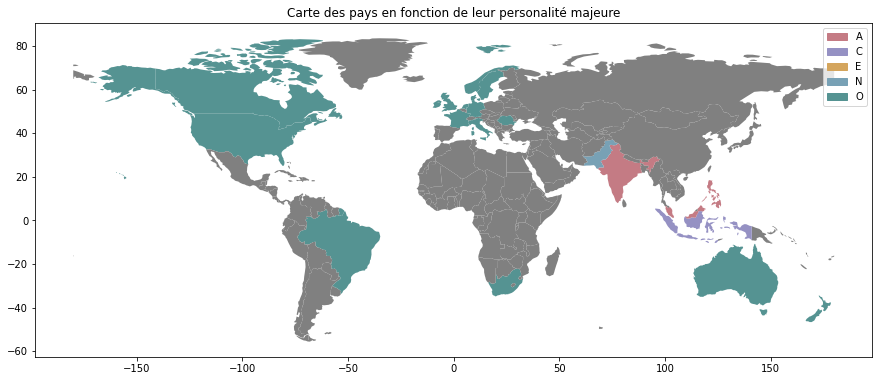

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15,9))
l=list()
for i in colors_dict:
    l.append(mpatches.Patch(color=colors_dict[i], label=i))
ax.legend(handles=l)
plt.title('Carte des pays en fonction de leur personalité majeure')
world.plot(color=world['color_majeur'],ax=ax)

<AxesSubplot:title={'center':'Carte des pays en fonction de leur personalité mineure'}>

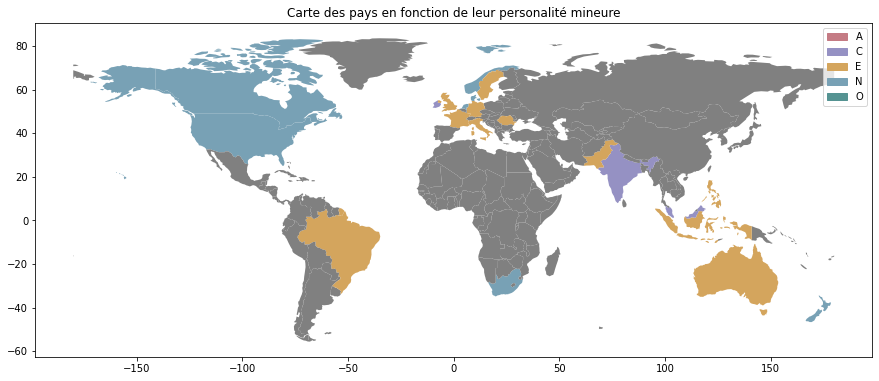

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15,9))
l=list()
for i in colors_dict:
    l.append(mpatches.Patch(color=colors_dict[i], label=i))
ax.legend(handles=l)
plt.title('Carte des pays en fonction de leur personalité mineure')
world.plot(color=world['color_mineur'],ax=ax)